## Zadanie 1

W metodach ClassifierSubsetEval / WrapperSubsetEval warto używać klasyfikatorów opartych na drzewach, np. J48, lub na regułach, np. PART czy JRip, ponieważ dobrze oddają relacje pomiędzy atrybutami a klasą i mogą wskazać istotność atrybutów w kontekście jakości klasyfikacji. Nie warto natomiast używać klasyfikatorów takich jak ZeroR, które nie korzystają z atrybutów w ogóle, ani też klasyfikatorów probabilistycznych (np. NaiveBayes), które zakładają niezależność cech i nie oddają dobrze interakcji między atrybutami — mogą przez to zniekształcać ocenę wartości poszczególnych kombinacji cech.

Krajobraz trafności dla Wrapper i ZeroR wyglądałby jak płaska kula – niezależnie od wykorzystanych atrybutów, wartość funkcji celu jest taka sama, ponieważ ZeroR zawsze wybiera najczęstszą klasę. Nie ma więc różnic pomiędzy podzbiorami – każdy punkt jest optimum globalnym.

Krajobraz trafności dla Wrapper i OneR wyglądałby jak dwie płaszczyzny: jedna wyżej (dla zbiorów zawierających najlepszy pojedynczy atrybut według OneR), druga niżej (dla pozostałych). Dla połowy kombinacji atrybutów (tych, które zawierają najlepszy atrybut) wartość funkcji celu jest wyższa. Dla algorytmu optymalizacji lokalnej krajobraz ten również jest łatwy, ale tylko dla dobrze zdefiniowanego sąsiedztwa: dla każdego punktu w jego najbliższym sąsiedztwie znajduje się taki jeden inny, który poprawia funkcję celu (albo wszystkie nie poprawiają, a 1 pogarsza jeśli jesteśmy w lokalnym optimum)

Dla zbioru Iris metody wykorzystujące Ranker (CorrelationAttributeEval, InfoGainAttributeEval, GainRatioAttributeEval, OneRAttributeEval) wybierając dwa atrybuty najczęściej wskazują na petalwidth i petallength. Correlation i InfoGain preferują petallength, natomiast GainRatio i OneR – petalwidth. Metoda WrapperSubsetEval z klasyfikatorem J48 również preferuje petalwidth dla większości metod przeszukiwania, choć dla RandomSearch wybrany został podzbiór {sepalwidth, petallength, petalwidth}.

Dla zbioru Soybean metody wykorzystujące Ranker zwracają zupełnie różne podzbiory atrybutów w zależności od użytego ewaluatora, co sugeruje, że zbiór zawiera wiele istotnych cech o złożonych zależnościach z klasą. Brak dominujących cech utrudnia wybór jednoznacznych najlepszych atrybutów. Metoda GreedyStepwise + WrapperSubsetEval zwróciła podzbiór składający się z 14 atrybutów, co może wskazywać na dużą liczbę współzależnych informacji potrzebnych do trafnej klasyfikacji.



## Zadanie 2

Załóżmy, że mamy wielowymiarowe dane i stosujemy transformację PCA usuwając jeden najmniej istotny wymiar (np. o wariancji 1%).
1) Czy jeśli po takiej transformacji przypadki są separowalne liniowo, to były one też separowalne liniowo w oryginalnej przestrzeni?
2) Czy jeśli po takiej transformacji przypadki nie są separowalne liniowo, to nie były one też separowalne liniowo w oryginalnej przestrzeni?

Odpowiedzi:

1) Tak, PCA to transformacja liniowa, która nie zmienia topologii danych. Jeśli dane są separowalne liniowo w przestrzeni PCA (czyli w przekształconej przestrzeni o mniejszej liczbie wymiarów), to były również separowalne liniowo w oryginalnej przestrzeni. Przekształcenie PCA może uprościć reprezentację, ale nie tworzy nowej liniowej separowalności, której wcześniej nie było.

2) Nie, PCA usuwa informacje – jeśli usuniemy nawet mało istotny (np. o wariancji 1%) wymiar, to możemy utracić cechę, która była kluczowa do liniowej separacji. Tak więc brak liniowej separowalności po redukcji nie oznacza, że nie istniała ona w oryginalnej przestrzeni.

Pierwszy, najbardziej istotny wymiar dla problemu "cpu" wyjaśnia 55,95% zmienności w zbiorze danych (pole proportion). Został wyznaczony jako kombinacja liniowa atrybutów z oryginalnego zbioru z przypisanymi wagami: -0.469 MMAX, -0.435 CHMIN, -0.429 CACH, -0.427 MMIN, -0.374 CHMAX i +0.29 MYCT. Oznacza to, że największy wpływ na ten wymiar mają atrybuty MMAX i CHMIN, natomiast najmniejszy – CHMAX i MYCT.

Kształt chmur punktów dla par pierwszych i par ostatnich atrybutów w przestrzeni przetransformowanej wyraźnie się różni. Dla pierwszych par (czyli najbardziej znaczących wymiarów) chmury punktów są położone bliżej narożników wykresu i rozciągnięte wzdłuż jednej osi. Świadczy to o dużej wariancji w tych wymiarach – to one w największym stopniu wyjaśniają zmienność danych i decydują o ich rozproszeniu. Natomiast dla ostatnich par atrybutów chmury są bardziej zwarte, mają okrągły kształt i są skupione bliżej środka wykresu, co oznacza, że w tych wymiarach zmienność danych jest znacznie mniejsza i mają one marginalny wpływ na strukturę zbioru.

Minimalna wartość varianceCovered, dla której warto zachować więcej niż jeden wymiar, wynosi 0,56. Tyle wynosi część zmienności wyjaśnianej przez pierwszy główny komponent PCA, co potwierdza, że dalsze wymiary wnoszą już znacznie mniej informacji.



## Zadanie 3

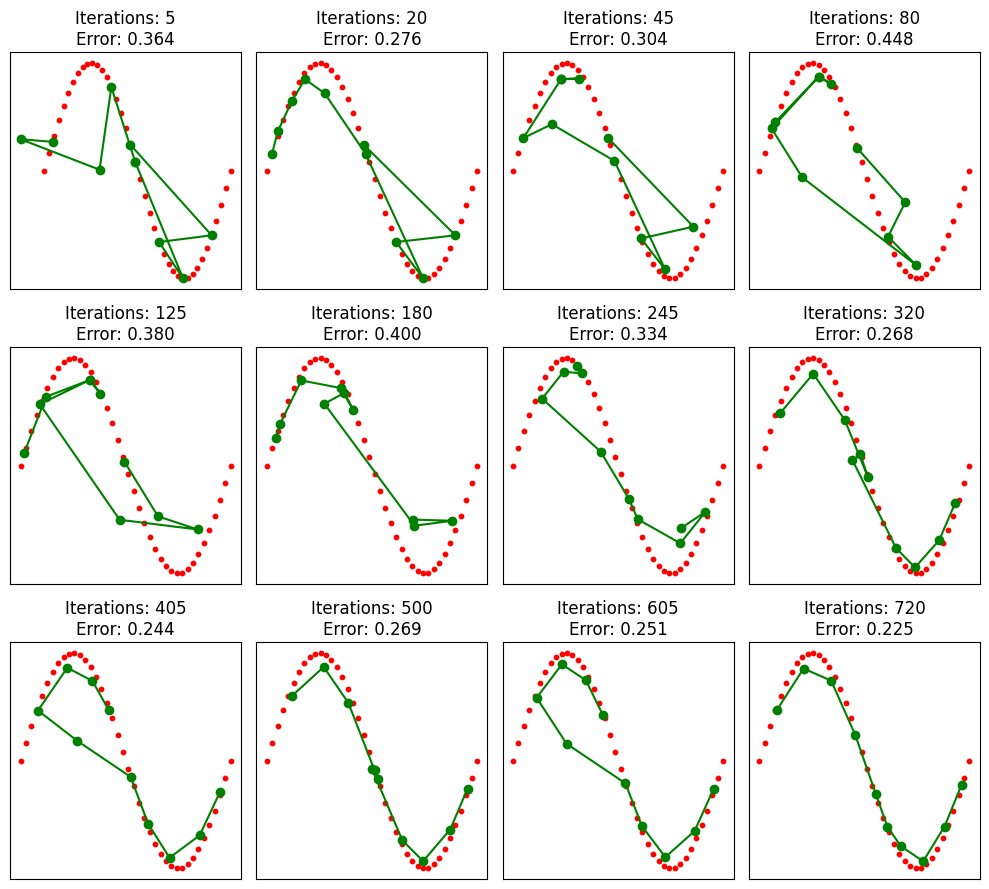

In [1]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

N_points = 40
N_neurons = 10
t = np.linspace(0, np.pi * 2, N_points)
x = t
y = np.sin(t)

som = MiniSom(1, N_neurons, 2, sigma=3, learning_rate=0.23, neighborhood_function='triangle', random_seed=0)
points = np.array([x, y]).T
som.random_weights_init(points)

plt.figure(figsize=(10, 9))
total_iter = 0
for i, iterations in enumerate(range(5, 116, 10)): # note: increasing training periods
	som.train(points, iterations, verbose=False, random_order=False) # continued training
	total_iter += iterations
	plt.subplot(3, 4, i + 1)
	plt.scatter(x, y, color='red', s=10)
	# print(som.get_weights())
	plt.plot(som.get_weights()[0][:, 0], som.get_weights()[0][:, 1], 'green', marker='o')
	plt.title("Iterations: %d\nError: %.3f" % (total_iter, som.quantization_error(points)))
	plt.xticks([])
	plt.yticks([])
plt.tight_layout()
plt.show()

Błąd kwantyzacji w MiniSom definiowany jest jako średnia odległość pomiędzy każdym punktem wejściowym a najlepiej dopasowanym do niego neuronem. Sieć Kohonena dokonuje więc pewnego rodzaju kwantyzacji – zamiast dokładnych wartości danych wejściowych wykorzystuje ich reprezentacje przybliżone w postaci ograniczonej liczby neuronów. W tym sensie błąd ten odzwierciedla, jak duża jest strata informacji wynikająca z tego uproszczenia.


To, w jaki sposób neurony zaczynają się zbiegać, zależy od zastosowanej funkcji sąsiedztwa. Domyślnie używana funkcja "gaussian" powoduje silne skupienie neuronów w pobliżu aktywowanego punktu, co na początku prowadzi do zagęszczenia ich w jednym rejonie – w tym przypadku w lewym górnym rogu wykresu. Aby uzyskać bardziej równomierne rozmieszczenie, można zastosować funkcję sąsiedztwa "bubble", która nie rozciąga tak bardzo efektu aktywacji na sąsiednie neurony.



Nie, bez zwiększenia liczby neuronów nie da się dokładnie odwzorować kształtu całej sinusoidy, szczególnie jej krańców. Analiza kolejnych wykresów pokazuje, że jeden z neuronów bardzo wcześnie dopasowuje się do skrajnego punktu krzywej i później praktycznie już nie zmienia swojego położenia. Pozostałe neurony rozkładają się głównie na środku, nie sięgając do końców wykresu. To ograniczenie wynika z małej liczby dostępnych neuronów, które nie są w stanie uchwycić całej złożoności danych.



Najlepsze wyniki uzyskano przy parametrach: learning_rate = 0.23 oraz neighbourhood_function = 'triangle', przy zachowaniu pozostałych ustawień niezmienionych.